In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from operator import itemgetter

In [7]:
nba_data = pd.read_csv('NBA_2018-2019.csv')

In [8]:
nba_data.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,428,7.6,0.474,0.673,...,19.7,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3
3,4,Steven Adams\adamsst01,C,25,OKC,80,2669,18.5,0.591,0.002,...,12.6,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,1913,17.9,0.623,0.031,...,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4


In [18]:
nba_data = nba_data.drop(['Rk'], axis=1)

In [19]:
nba_data.shape

(708, 26)

In [20]:
nba_data.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [24]:
nba_data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [25]:
nba_data = nba_data.drop(['Tm'], axis=1)

In [26]:
nba_data.columns

Index(['Player', 'Pos', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [27]:
nba_data.isnull().sum()*100/nba_data.isnull().count()

Player    0.000000
Pos       0.000000
Age       0.000000
G         0.000000
MP        0.000000
PER       0.000000
TS%       0.847458
3PAr      0.847458
FTr       0.847458
ORB%      0.000000
DRB%      0.000000
TRB%      0.000000
AST%      0.000000
STL%      0.000000
BLK%      0.000000
TOV%      0.847458
USG%      0.000000
OWS       0.000000
DWS       0.000000
WS        0.000000
WS/48     0.000000
OBPM      0.000000
DBPM      0.000000
BPM       0.000000
VORP      0.000000
dtype: float64

In [35]:
nba_data["TS%"].fillna(0, inplace =True)
nba_data["3PAr"].fillna(0, inplace =True)
nba_data["FTr"].fillna(0, inplace =True)
nba_data["TOV%"].fillna(0, inplace =True)

In [29]:
nba_data.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,708.000000,708.000000,708.000000,708.000000,702.000000,702.000000,702.000000,708.000000,708.000000,708.000000,...,702.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,26.142655,42.882768,972.257062,12.745763,0.531477,0.380060,0.249305,4.979802,15.169068,10.071893,...,12.021510,18.490678,1.002542,0.963983,1.968220,0.071556,-1.511017,-0.578672,-2.091525,0.442514
std,4.141178,26.282043,802.770673,7.350963,0.113474,0.219856,0.177407,5.956338,8.297935,5.763570,...,5.578927,5.686523,1.676595,1.030752,2.514443,0.118688,4.165931,2.480814,5.320754,1.181068
min,19.000000,1.000000,1.000000,-38.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.800000,-0.500000,-1.700000,-0.946000,-36.100000,-20.500000,-52.300000,-2.200000
25%,23.000000,19.000000,245.250000,9.300000,0.500000,0.252750,0.154000,1.900000,9.900000,6.200000,...,9.000000,15.000000,0.000000,0.200000,0.200000,0.032000,-2.900000,-1.700000,-4.000000,-0.100000
50%,26.000000,44.000000,788.000000,12.400000,0.544000,0.389000,0.225000,3.300000,13.400000,8.700000,...,11.500000,17.800000,0.400000,0.650000,1.100000,0.077000,-1.250000,-0.600000,-1.700000,0.000000
75%,29.000000,68.000000,1579.500000,16.200000,0.581000,0.530000,0.311500,7.000000,19.200000,12.850000,...,14.400000,21.800000,1.500000,1.400000,2.800000,0.119000,0.125000,0.800000,0.200000,0.600000
max,42.000000,82.000000,3028.000000,80.400000,1.500000,1.000000,2.000000,100.000000,90.300000,51.600000,...,50.000000,47.200000,11.400000,5.900000,15.200000,1.261000,38.200000,8.500000,44.900000,9.900000


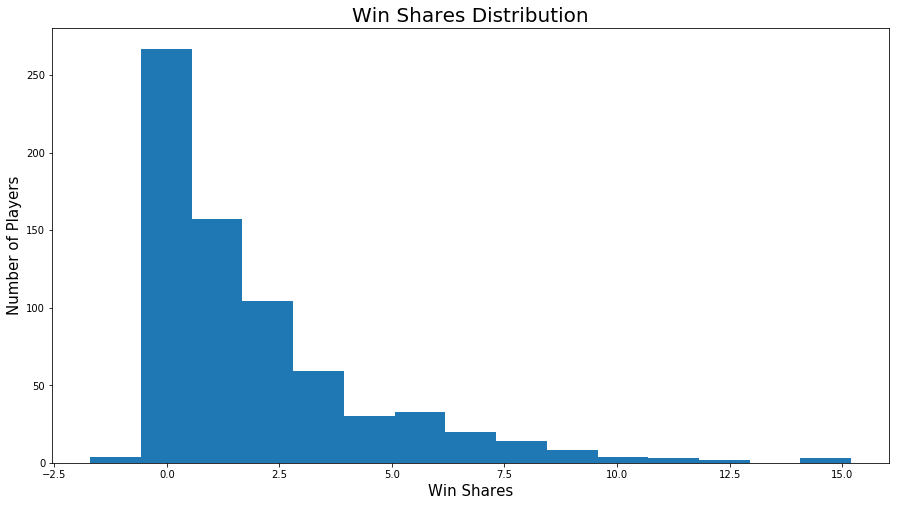

In [10]:
plt.figure(figsize = (15,8))
plt.hist(nba_data['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);

In [30]:
nba_data.median()

Age       26.000
G         44.000
MP       788.000
PER       12.400
TS%        0.544
3PAr       0.389
FTr        0.225
ORB%       3.300
DRB%      13.400
TRB%       8.700
AST%      10.600
STL%       1.400
BLK%       1.200
TOV%      11.500
USG%      17.800
OWS        0.400
DWS        0.650
WS         1.100
WS/48      0.077
OBPM      -1.250
DBPM      -0.600
BPM       -1.700
VORP       0.000
dtype: float64

In [36]:
nba_data.isnull().sum()*100/nba_data.isnull().count()

Player    0.0
Pos       0.0
Age       0.0
G         0.0
MP        0.0
PER       0.0
TS%       0.0
3PAr      0.0
FTr       0.0
ORB%      0.0
DRB%      0.0
TRB%      0.0
AST%      0.0
STL%      0.0
BLK%      0.0
TOV%      0.0
USG%      0.0
OWS       0.0
DWS       0.0
WS        0.0
WS/48     0.0
OBPM      0.0
DBPM      0.0
BPM       0.0
VORP      0.0
dtype: float64

In [37]:
nba_data.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,26.142655,42.882768,972.257062,12.745763,0.526973,0.376839,0.247192,4.979802,15.169068,10.071893,...,11.919633,18.490678,1.002542,0.963983,1.968220,0.071556,-1.511017,-0.578672,-2.091525,0.442514
std,4.141178,26.282043,802.770673,7.350963,0.123061,0.221680,0.178127,5.956338,8.297935,5.763570,...,5.663598,5.686523,1.676595,1.030752,2.514443,0.118688,4.165931,2.480814,5.320754,1.181068
min,19.000000,1.000000,1.000000,-38.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.800000,-0.500000,-1.700000,-0.946000,-36.100000,-20.500000,-52.300000,-2.200000
25%,23.000000,19.000000,245.250000,9.300000,0.499000,0.249250,0.153000,1.900000,9.900000,6.200000,...,8.900000,15.000000,0.000000,0.200000,0.200000,0.032000,-2.900000,-1.700000,-4.000000,-0.100000
50%,26.000000,44.000000,788.000000,12.400000,0.543500,0.388000,0.223000,3.300000,13.400000,8.700000,...,11.500000,17.800000,0.400000,0.650000,1.100000,0.077000,-1.250000,-0.600000,-1.700000,0.000000
75%,29.000000,68.000000,1579.500000,16.200000,0.581000,0.530000,0.309250,7.000000,19.200000,12.850000,...,14.400000,21.800000,1.500000,1.400000,2.800000,0.119000,0.125000,0.800000,0.200000,0.600000
max,42.000000,82.000000,3028.000000,80.400000,1.500000,1.000000,2.000000,100.000000,90.300000,51.600000,...,50.000000,47.200000,11.400000,5.900000,15.200000,1.261000,38.200000,8.500000,44.900000,9.900000


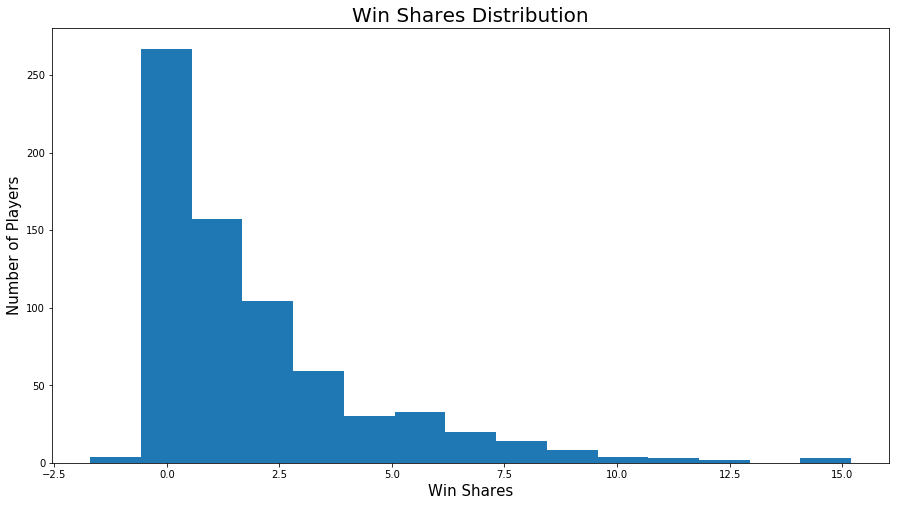

In [38]:
plt.figure(figsize = (15,8))
plt.hist(nba_data['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);

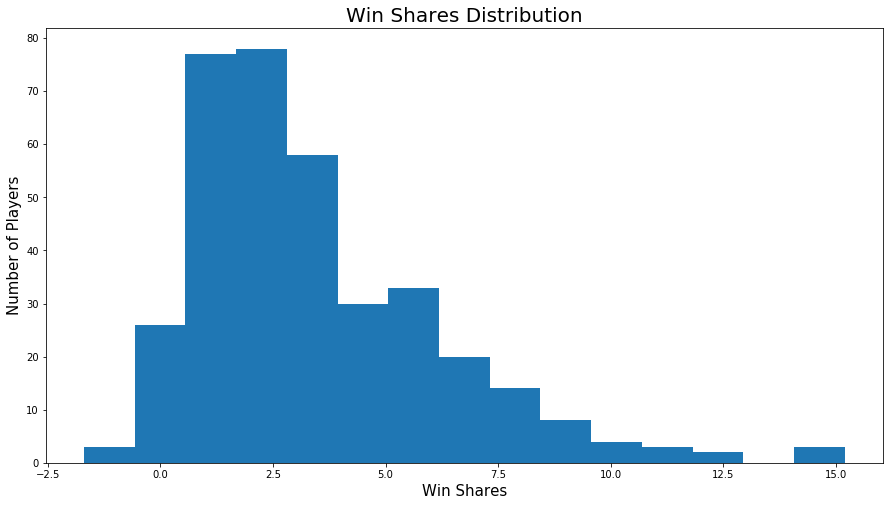

In [42]:
nba_data = nba_data[nba_data['G'] > 41]

plt.figure(figsize = (15,8))
plt.hist(nba_data['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);


In [43]:
nba_data.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,...,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.00000,359.000000
mean,26.362117,65.693593,1594.526462,14.389136,0.558212,0.367944,0.253696,4.699721,15.354875,10.031476,...,12.010028,18.994708,1.823120,1.618942,3.441504,0.097362,-0.315877,-0.035097,-0.35571,0.886908
std,4.237675,11.873906,619.985884,4.624953,0.046285,0.199613,0.123976,3.675500,6.221756,4.644711,...,3.510361,5.227383,1.995566,1.057814,2.763151,0.056161,2.131199,1.784538,2.85976,1.509290
min,19.000000,44.000000,292.000000,5.200000,0.450000,0.000000,0.046000,0.700000,5.900000,3.700000,...,3.700000,8.000000,-2.800000,-0.500000,-1.700000,-0.040000,-5.500000,-4.100000,-8.40000,-2.200000
25%,23.000000,56.000000,1087.000000,11.200000,0.528500,0.251500,0.168500,2.000000,10.650000,6.450000,...,9.700000,15.000000,0.500000,0.900000,1.500000,0.059000,-1.600000,-1.300000,-2.20000,-0.100000
50%,26.000000,67.000000,1560.000000,13.200000,0.556000,0.388000,0.229000,3.200000,14.100000,8.700000,...,11.500000,18.000000,1.300000,1.400000,2.800000,0.094000,-0.500000,-0.200000,-0.70000,0.400000
75%,29.000000,76.000000,2078.000000,17.200000,0.587000,0.520500,0.310500,6.600000,18.950000,12.700000,...,13.800000,22.300000,2.700000,2.200000,5.000000,0.126000,0.800000,1.100000,1.10000,1.350000
max,42.000000,82.000000,3028.000000,30.900000,0.698000,0.914000,0.879000,16.800000,35.900000,25.900000,...,26.800000,40.500000,11.400000,5.900000,15.200000,0.292000,10.500000,5.700000,11.70000,9.900000


In [45]:
WS_corr = nba_data.corr()['WS'].reset_index()
WS_corr = WS_corr.sort_values(['WS'], ascending = False)
WS_corr

,index,WS
17,WS,1.000000
15,OWS,0.951893
22,VORP,0.924296
21,BPM,0.868158
18,WS/48,0.840768
16,DWS,0.815519
3,PER,0.814612
19,OBPM,0.791992
2,MP,0.685843
4,TS%,0.604509


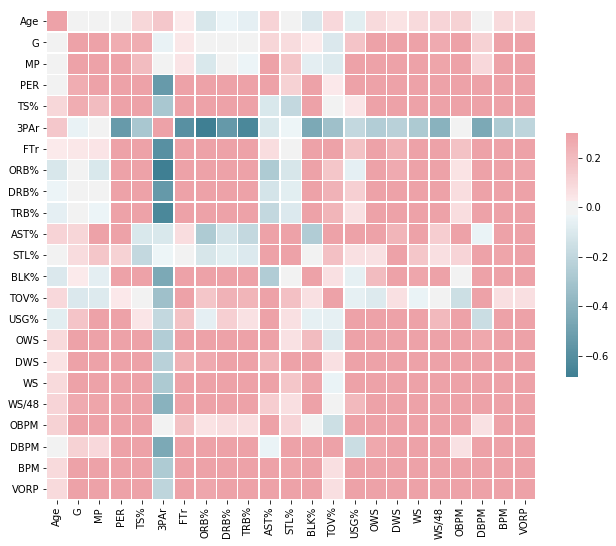

In [48]:
corr = nba_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

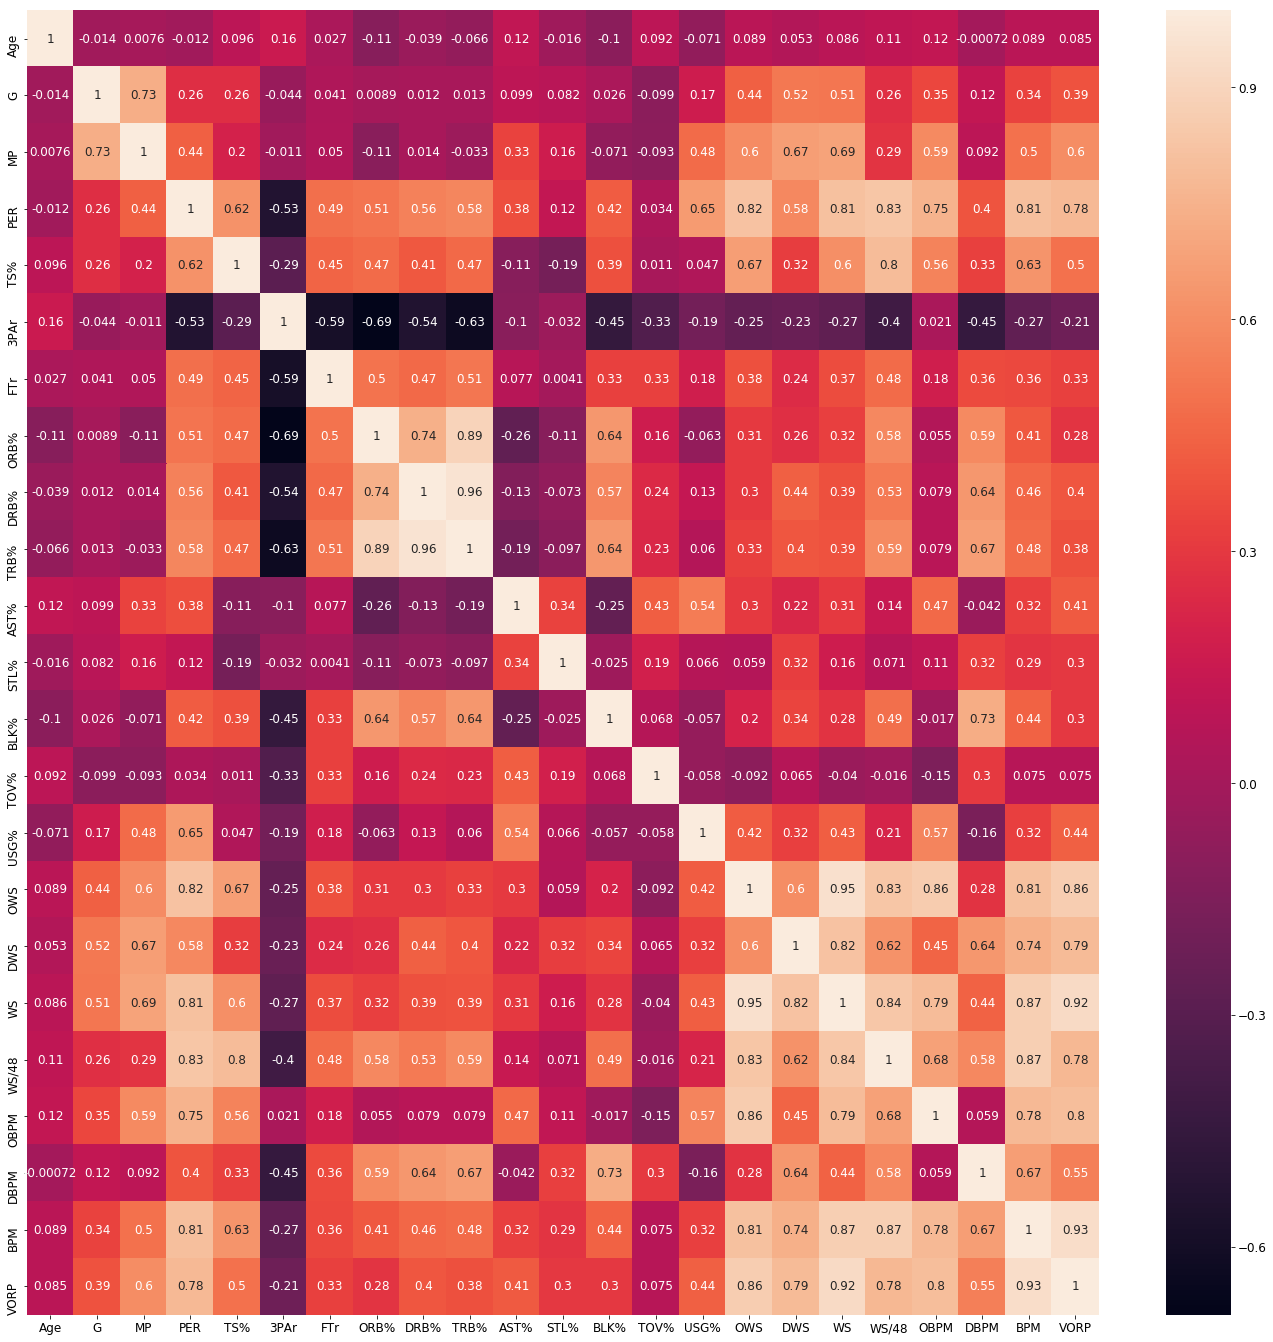

In [52]:
plt.rcParams['figure.figsize'] = (24.0, 24.0)
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, annot=True);